In [ ]:

# libraries for data wrangling
import pandas as pd
import numpy as np

# library for plotting
from plotnine import *
import matplotlib.pyplot as plt

# ML workflow packages
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.metrics import classification_report, roc_curve, auc,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder

# ML models
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor



#### Supervised Machine Learning Model Workflow
##### 1. Load Data
##### 2. Visualize, Clean, and Preprocess Data
##### 3. Create Model Instance
##### 4. Fit Model on Data
##### 5. Make Predictions and Evaluate Model 

In [3]:
# 1. Load Data
df = pd.read_csv("https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/refs/heads/master/data/data_moods.csv")
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


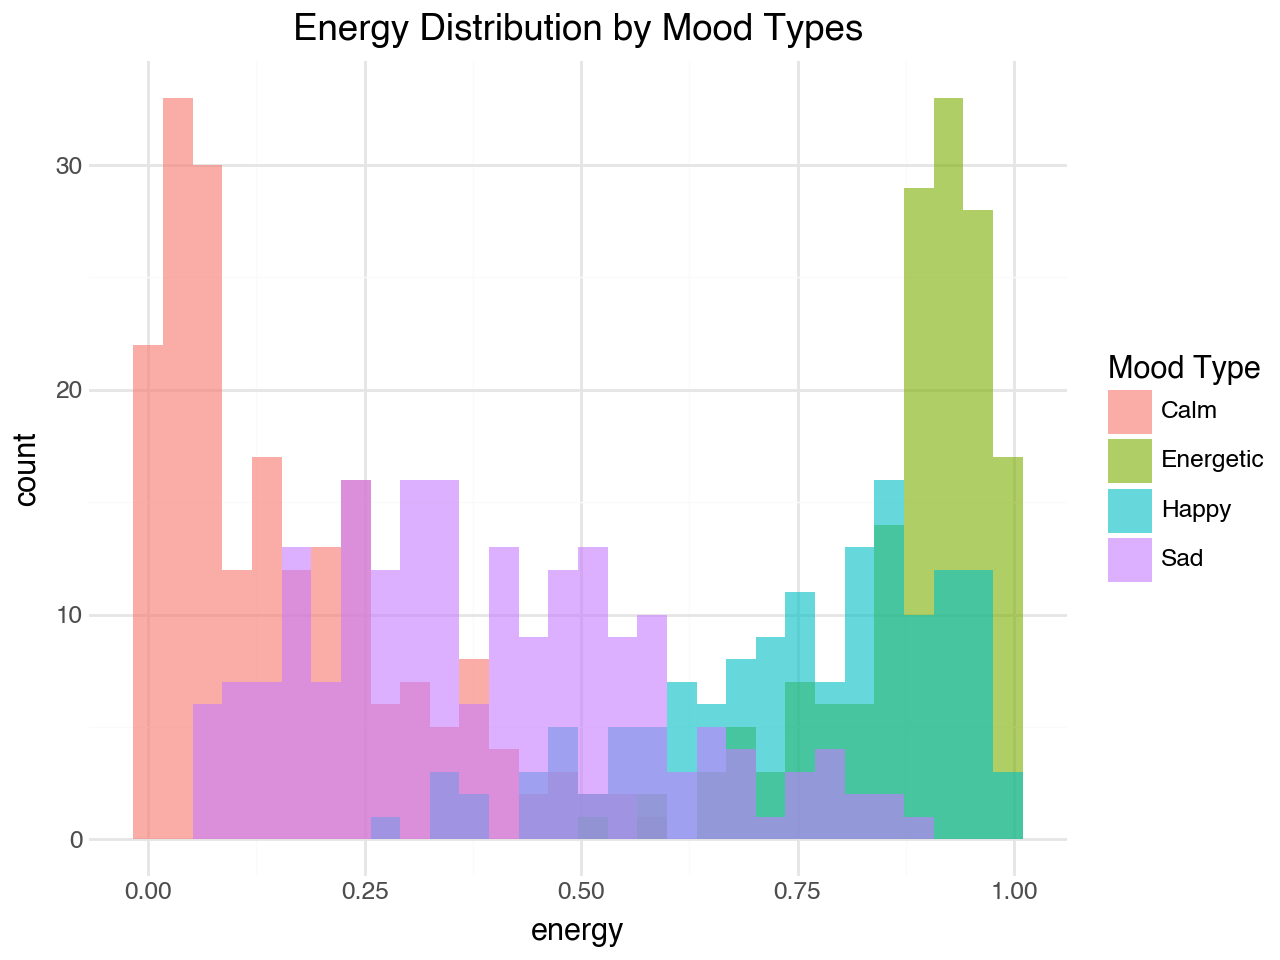

In [4]:
# 2. Visualize, Clean, and Preprocess Data

# use plotnine's ggplot function to visualize the distribution of energy across moods
(
    ggplot(df, aes(x='energy', fill='factor(mood)'))
    + geom_histogram(bins=30, alpha=0.6, position='identity')
    + labs(title='Energy Distribution by Mood Types', fill='Mood Type')
    + theme_minimal()
)

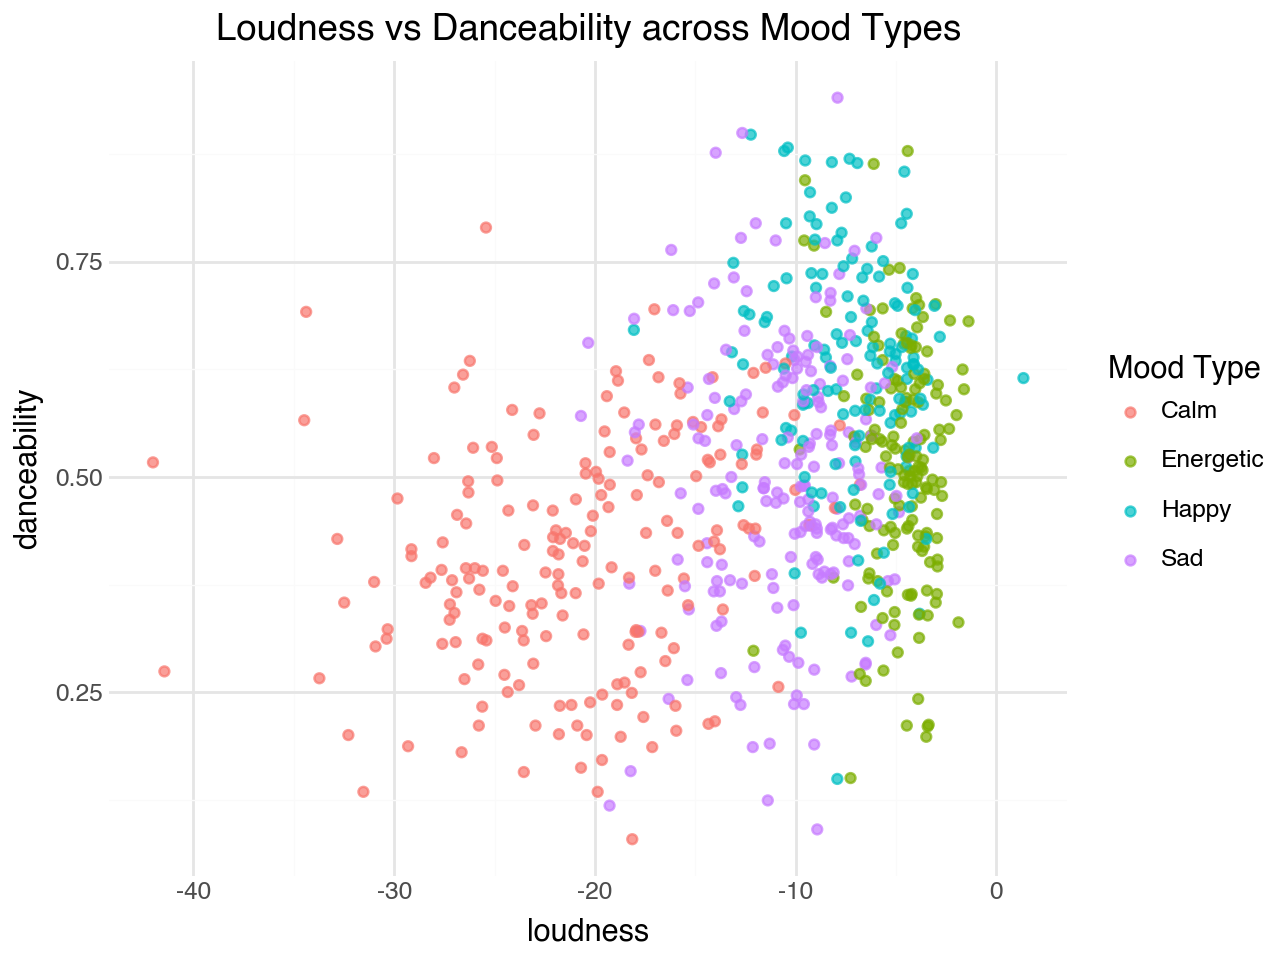

In [5]:
# scatter plot of two features color-coded by target variable
(
    ggplot(df, aes(x='loudness', y='danceability', color='factor(mood)'))
    + geom_point(alpha=0.7)
    + labs(title='Loudness vs Danceability across Mood Types', color='Mood Type')
    + theme_minimal()
)

Let's drop the Happy and Sad classes to make it a binary classification problem

In [6]:
df = df[(df['mood'] == 'Calm') | (df['mood'] == 'Energetic')]

In [7]:
df['mood'].value_counts()

mood
Calm         195
Energetic    154
Name: count, dtype: int64

In [8]:
# set X and y
X = df[['danceability','liveness','length','popularity','acousticness','liveness','tempo','time_signature']]
y = df['mood']

In [9]:
# one-hot encode time_signature
X = pd.get_dummies(X, columns=['time_signature'])

In [10]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [11]:
# standardization applied to features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

First, we train a Decision Tree Classifier to predict mood type

In [12]:
# 3. Create Model Instance
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# 4. Fit Model on Data
dt_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
# 5. Evaluate Model
y_pred = dt_classifier.predict(X_test)
print(f"\n\n Decision Tree Classification Report")
print(classification_report(y_test, y_pred)) # produce classification report



 Decision Tree Classification Report
              precision    recall  f1-score   support

        Calm       0.95      0.95      0.95        42
   Energetic       0.93      0.93      0.93        28

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



In [15]:
# 3. Create Model Instance
logistic_model = LogisticRegression()

# 4. Fit Model on Data
logistic_model.fit(X_train, y_train)

# 5. Evaluate Model
y_pred = logistic_model.predict(X_test)
print(f"\n\n Decision Tree Classification Report")
print(classification_report(y_test, y_pred)) # produce classification report




 Decision Tree Classification Report
              precision    recall  f1-score   support

        Calm       0.98      0.95      0.96        42
   Energetic       0.93      0.96      0.95        28

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70



We can also generate the ROC curve

In [16]:
le = LabelEncoder()
y_true_num = le.fit_transform(y_test)  # e.g., Calm → 0, Energetic → 1

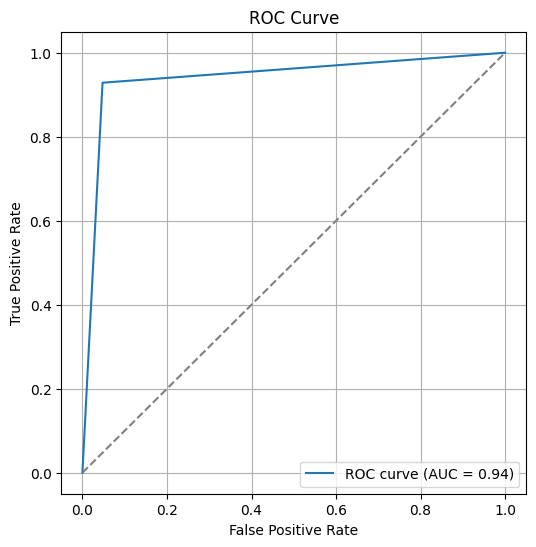

In [17]:
y_proba = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_true_num, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Repeat the ML workflow to train a Decision Tree Regressor and a Linear Regression model, to predict energy.
Generate a correlation matrix first to exclude features that may be too linearly related. Note that evaluation of a model that predicts a continuous value may not be done using Accuracy, Recall, or Precision. 

In [18]:
def generate_matrix(corr_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar(label='Correlation Coefficient')
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

    # Add correlation coefficients on heatmap
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                    ha='center', va='center', color='black')

    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()


In [ ]:
# extract numerical features + energy from data frame

In [20]:
# use df_name.corr() function to get correlation matrix

In [21]:
# use the generate_matrix() function to visualize the matrix

In [ ]:
# use your selected features to train the two models to predict energy

#dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
#...

#linear_regressor = LinearRegression()
#...



In [ ]:
# use your trained models to predict energy on the test set and evaluate their performance using MSE and R² metrics
# what to the model outputs suggest?

#r2_score(y_test, model_name.predict(X_test))
#mean_squared_error(y_test, model_name.predict(X_test))